### Data Analysis for Open-Ended Pathology VQA

This code will perform the anaylysis for the data collected by the Pathologists

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Reading the data

In [2]:
vqa_data = pd.read_csv('data/open_ended_vqa.csv')
vqa_data = vqa_data.rename(columns={vqa_data.columns[2]: 'Image Path'})
vqa_data.head()

,Timestamp,Pathologist ID,Image Path,Organ,Categorization,Regional Anatomy,Open Ended - Question 1,Open Ended - Answer 1,Open Ended - Answer 2,Open Ended - Question 2,...,MCQ - Option 2,MCQ - Option 3,MCQ - Option 4,MCQ - Option 5,MCQ - Answer,Close-Ended Question 1,Close-Ended Answer 1,Image Magnification,Open Ended - Wrong Answer 1,Open Ended - Wrong Answer 2
0,2/25/2025 13:41:20,CK,https://drive.google.com/open?id=1tgv50Q9W4Bm_...,Hematolymphoid - Lymph Nodes,Neoplasia (Malignant),Lymph node,What is the primary architectural pattern obse...,Nodular pattern,Germinal centers are absent,What is a common component of lymph node archi...,...,Adrenal gland,Pancreas,Bone marrow,Retina,Option 1,Is this a normal pattern observed?,No,20x,NaN,NaN
1,2/25/2025 13:46:25,CK,https://drive.google.com/open?id=1igYpj4RL0XKx...,Hematolymphoid - Lymph Nodes,Neoplasia (Malignant),Lymph node,What is the predominant cell type seen here?,The main cell type observed here is a lymphocy...,These would best be characterized as small lym...,What is the best description for the cell size...,...,Mantle cell lymphoma,Diffuse large B-cell lymphoma,Hairy cell leukemia,Follicular lymphoma,Option 2,Is the nucleus to cytoplasmic ratio of these l...,Yes,200x,NaN,NaN
2,2/25/2025 13:51:37,CK,https://drive.google.com/open?id=1DKNZJQJ17SkX...,Hematolymphoid - Lymph Nodes,Neoplasia (Malignant),Lymph node,"In this mantle cell lymphoma, what is the best...",The nuclei of the abnormal lymphocytes are mos...,This should be considered a highly cellular ti...,What is the best description for the density a...,...,Increased red blood cells,Low nuclear:cytoplasmic ratio,Frequent mitotic figures,Many histiocytes,Option 4,Does this tumor have morphologic features of d...,No,400x,NaN,NaN
3,2/26/2025 11:30:23,CK,https://drive.google.com/open?id=1jUe0z6wlZ0s9...,Gastrointestinal - Small Intenstine,Infection (Benign),Intestinal villous mucosa,"In a child with poor weight gain, what are the...",Features that argue against celiac disease in ...,Granulomas here are often the consequence of u...,What does the granuloma in the lamina propria ...,...,Giardia gastroenteritis,Celiac disease,Norovirus,Crohn disease,Option 5,Is the mucosal architecture normal?,Yes,40x,NaN,NaN
4,2/26/2025 11:42:26,CK,https://drive.google.com/open?id=1VNr78I5w671g...,Gastrointestinal - Dudenum,Infection (Benign),Intestinal villous mucosa,What are the main histologic features of a non...,Non-necrotizing granulomas are characterized b...,NaN,NaN,...,Brush border,Paneth cells,Mucous cells,Histiocytes,Option 3,Are duodenum granulomas typically found with c...,No,100x,NaN,NaN


#### Total Cases/Images

In [3]:
print("Total Cases:", len(vqa_data))
print("Total Images:", len(vqa_data))

Total Cases: 120
Total Images: 120


#### Pathologist  Cases Breakdown

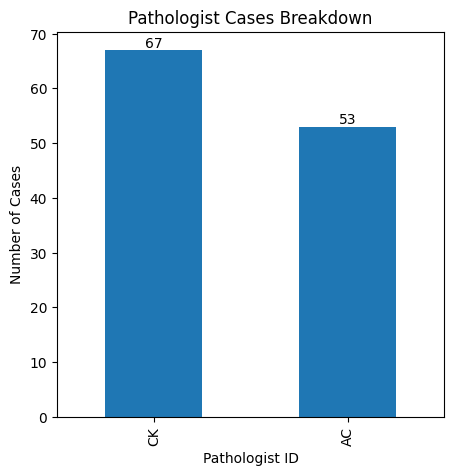

In [4]:
ax = vqa_data['Pathologist ID'].value_counts().plot(kind='bar', figsize=(5, 5), title='Pathologist Cases Breakdown', xlabel='Pathologist ID', ylabel='Number of Cases', label='Pathologist ID')
ax.bar_label(ax.containers[0])
plt.show()

#### Image Magnification Breakdown

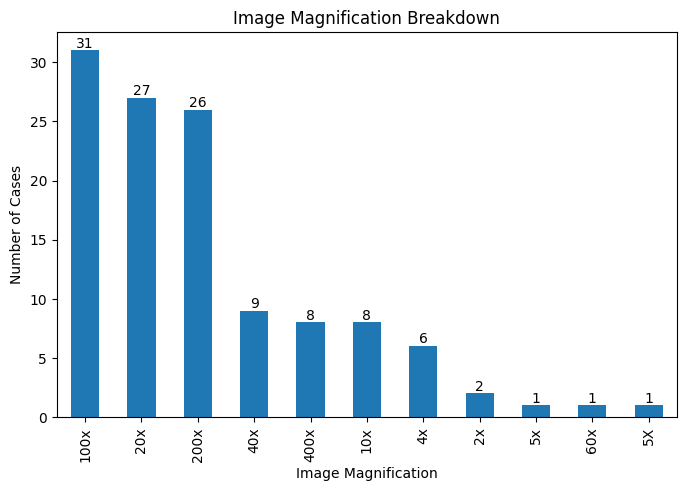

In [5]:
ax=vqa_data['Image Magnification'].value_counts().plot(kind='bar', figsize=(8, 5), title='Image Magnification Breakdown', xlabel='Image Magnification', ylabel='Number of Cases')
ax.bar_label(ax.containers[0])
plt.show()

#### Organ Breakdown

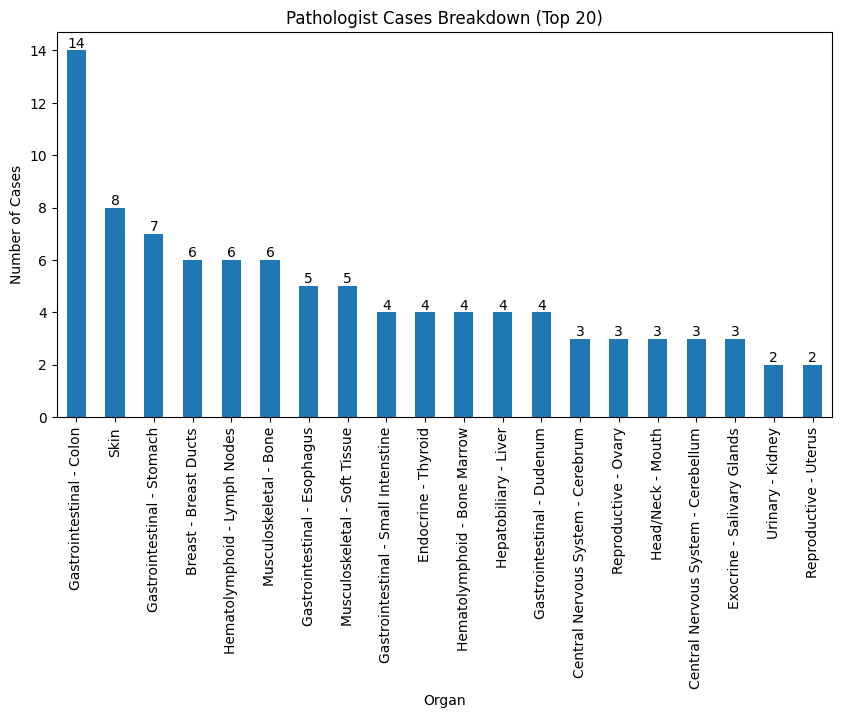

In [6]:
ax = vqa_data['Organ'].value_counts().head(20).plot(kind='bar', figsize=(10, 5), title='Pathologist Cases Breakdown (Top 20)', xlabel='Organ', ylabel='Number of Cases')
ax.bar_label(ax.containers[0])
plt.show()

#### Categorization Breakdown

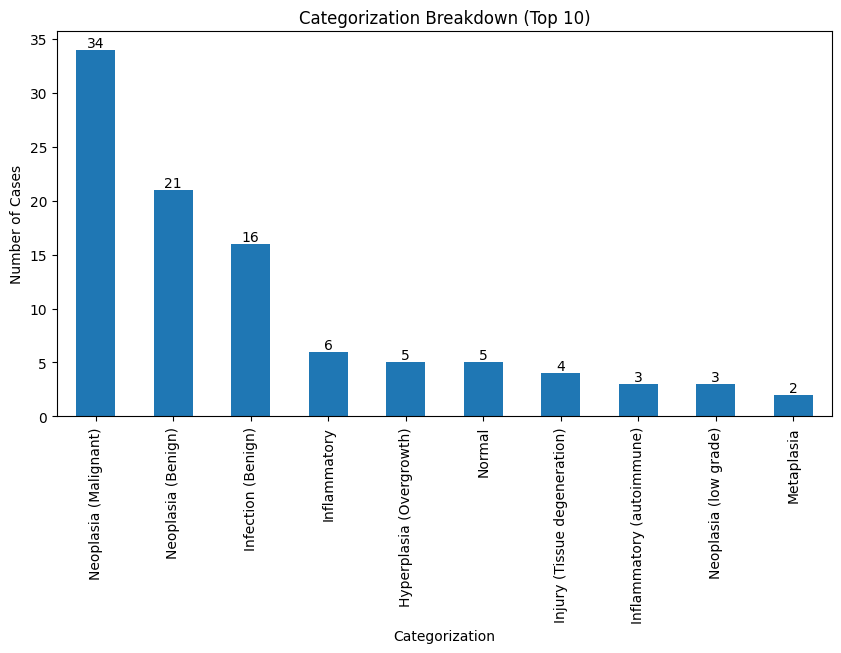

In [7]:
ax = vqa_data['Categorization'].value_counts().head(10).plot(kind='bar', figsize=(10, 5), title='Categorization Breakdown (Top 10)', xlabel='Categorization', ylabel='Number of Cases')
ax.bar_label(ax.containers[0])
plt.show()

#### Regional Anatomy Breakdown

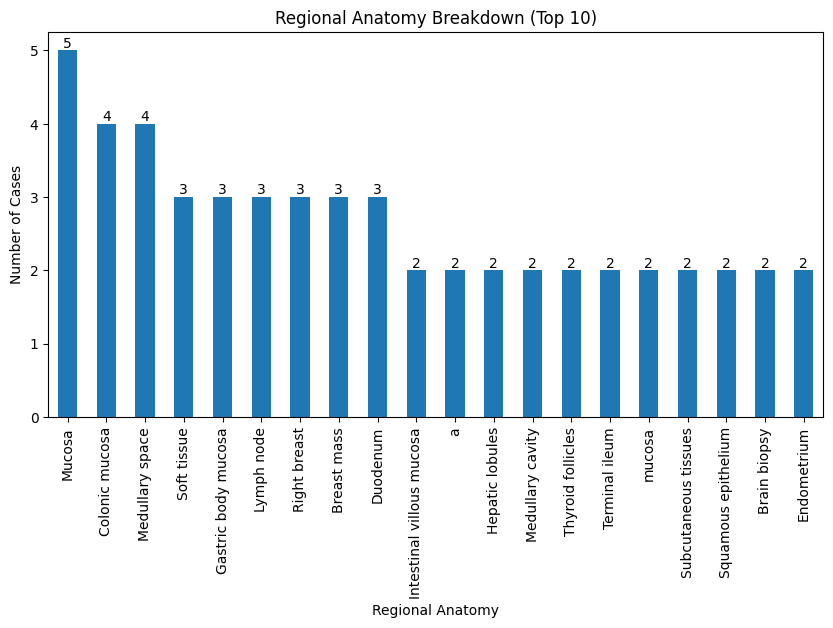

In [8]:
ax = vqa_data['Regional Anatomy'].value_counts().head(20).plot(kind='bar', figsize=(10, 5), title='Regional Anatomy Breakdown (Top 10)', xlabel='Regional Anatomy', ylabel='Number of Cases')
ax.bar_label(ax.containers[0])
plt.show()

#### Open-Ended Questions/Answers

In [9]:
open_ended_1 = vqa_data[(~vqa_data['Open Ended - Question 1'].isnull()) & (~vqa_data['Open Ended - Answer 1'].isnull())]
open_ended_1_with_wrong = vqa_data[(~vqa_data['Open Ended - Question 1'].isnull()) & (~vqa_data['Open Ended - Answer 1'].isnull()) & (~vqa_data['Open Ended - Wrong Answer 1'].isnull())]
open_ended_1_without_wrong = vqa_data[(~vqa_data['Open Ended - Question 1'].isnull()) & (~vqa_data['Open Ended - Answer 1'].isnull()) & (vqa_data['Open Ended - Wrong Answer 1'].isnull())]

open_ended_2 = vqa_data[(~vqa_data['Open Ended - Question 2'].isnull()) & (~vqa_data['Open Ended - Answer 2'].isnull())]
open_ended_2_with_wrong = vqa_data[(~vqa_data['Open Ended - Question 2'].isnull()) & (~vqa_data['Open Ended - Answer 2'].isnull()) & (~vqa_data['Open Ended - Wrong Answer 2'].isnull())]
open_ended_2_without_wrong = vqa_data[(~vqa_data['Open Ended - Question 2'].isnull()) & (~vqa_data['Open Ended - Answer 2'].isnull()) & (vqa_data['Open Ended - Wrong Answer 2'].isnull())]

In [10]:
open_ended = len(open_ended_1) + len(open_ended_2)
open_ended_with_wrong = len(open_ended_1_with_wrong) + len(open_ended_2_with_wrong)
open_ended_without_wrong = len(open_ended_1_without_wrong) + len(open_ended_2_without_wrong)

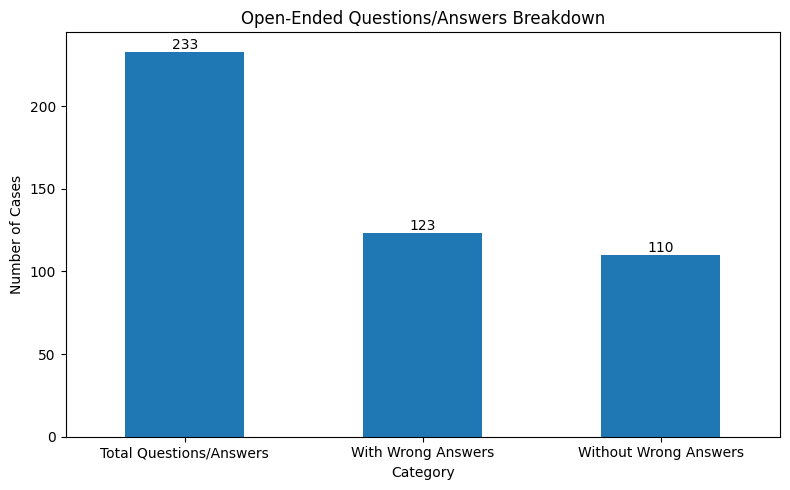

In [11]:
ax = pd.Series({
    'Total Questions/Answers': open_ended,
    'With Wrong Answers': open_ended_with_wrong,
    'Without Wrong Answers': open_ended_without_wrong
}).plot(kind='bar', figsize=(8, 5), title='Open-Ended Questions/Answers Breakdown', xlabel='Category', ylabel='Number of Cases')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Multiple Choice Questions/Answers

In [12]:
print("Total MCQ Questions/Answers: ", len(vqa_data[(~vqa_data['MCQ - Question'].isnull()) &
                                        (~vqa_data['MCQ - Option 1'].isnull()) &
                                        (~vqa_data['MCQ - Option 2'].isnull()) &
                                        (~vqa_data['MCQ - Option 3'].isnull()) &
                                        (~vqa_data['MCQ - Option 4'].isnull()) &
                                        (~vqa_data['MCQ - Option 5'].isnull()) &
                                        (~vqa_data['MCQ - Answer'].isnull())]))

Total MCQ Questions/Answers:  120


#### Close-Ended Questions/Answers

In [13]:
print("Total Close-Ended Questions/Answers: ", len(vqa_data[(~vqa_data['Close-Ended Question 1'].isnull()) &
                                                    (~vqa_data['Close-Ended Answer 1'].isnull())]))

Total Close-Ended Questions/Answers:  120
